# ICA

## Introductory notes:
This notebook presents ICA artifact repairment functionality:
* Fitting ICA
* Exploring components
* Excluding components from the raw data

Recommended reading:
1. [MNE: Repairing artifacts with ICA](https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html)
2. [Learning eeg: artifacts](https://www.learningeeg.com/artifacts)

## Import data

### Import module

In [1]:
from sleepeegpy.pipeline import ICAPipe
from os import makedirs, path
import mne

mne.set_log_level("ERROR")

### Initialize ICAPipe object

If you wish to change the path for output_dir ot input dir, change it below.
If no such folders, they will be created automatically.

In [2]:
output_dir = "output_folder"  # Output path and name can be changed here
input_dir = "input_files"  # input files dir can be changed here
makedirs(input_dir, exist_ok=True)
makedirs(output_dir, exist_ok=True)

#### Add required files
* Put all your files in the input folder.
* Modify your eeg file name below. The file can be any format supported by the mne.read_raw() function.
* For more information about the supported formats, see [mne documentation](https://mne.tools/stable/generated/mne.io.Raw.html)

In [3]:
eeg_file_name = "resampled_raw.fif"
ica_file_name = (
    None  # If you want to load already fitted ICA - replace None with the file name.
)

In [ ]:
path_to_eeg = path.join(input_dir, eeg_file_name)
path_to_ica = path.join(input_dir, ica_file_name) if ica_file_name else None

ica_pipe = ICAPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=path_to_eeg,
    output_dir=output_dir,
    method="fastica",  # ICA method, can be either 'fastica', 'infomax' or 'picard'
    fit_params=None,  # Additional parameters passed to the ICA estimator as specified by 'method'.
    n_components=40,  # was 40,  Number of principal components that are passed to the ICA algorithm during fitting.
    random_state=120,  # A seed for the NumPy random number generator (RNG).
    path_to_ica=path_to_ica,
)

## Fit
Run the ICA decomposition on 1 Hz high-pass filtered data

In [ ]:
ica_pipe.fit(filter_kwargs=dict(l_freq=1.0, h_freq=None, n_jobs=-1))

## Explore

Plot independent components from raw data, you can select here components you want to exclude.

In [ ]:
ica_pipe.plot_sources()

Plot components on interpolated sensor topography.

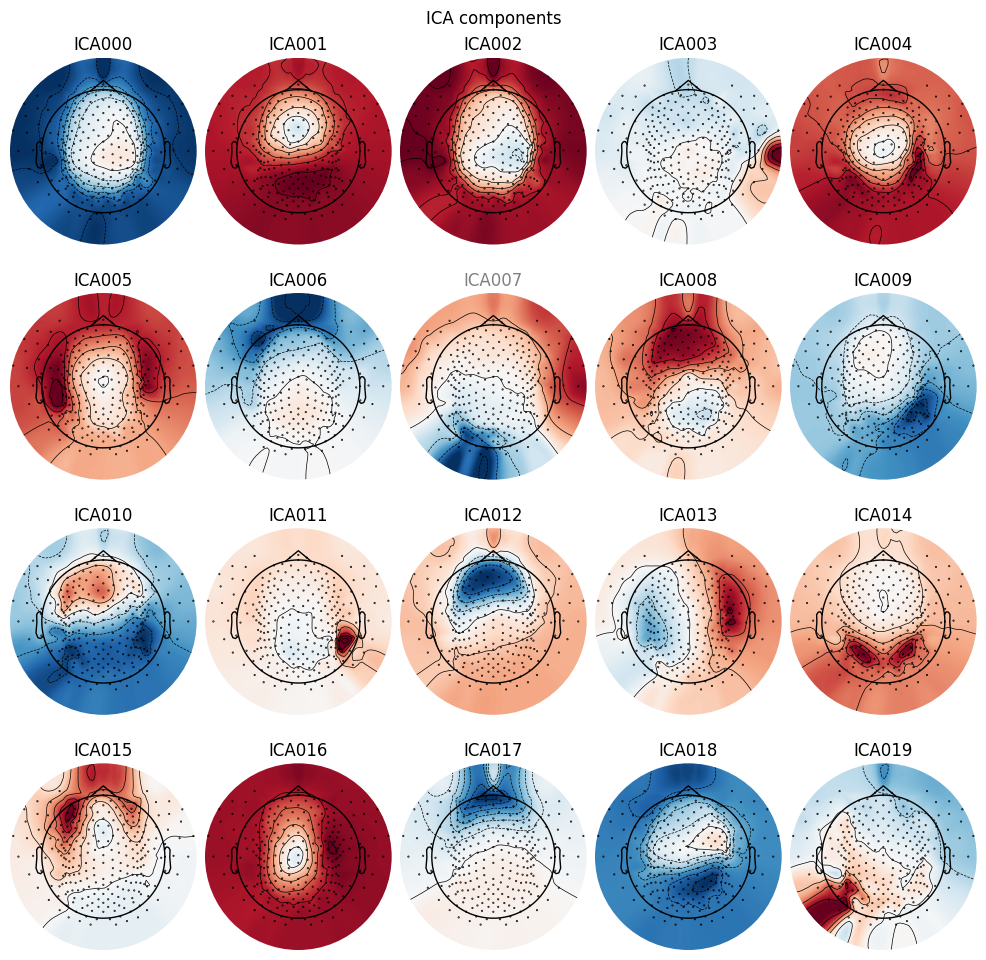

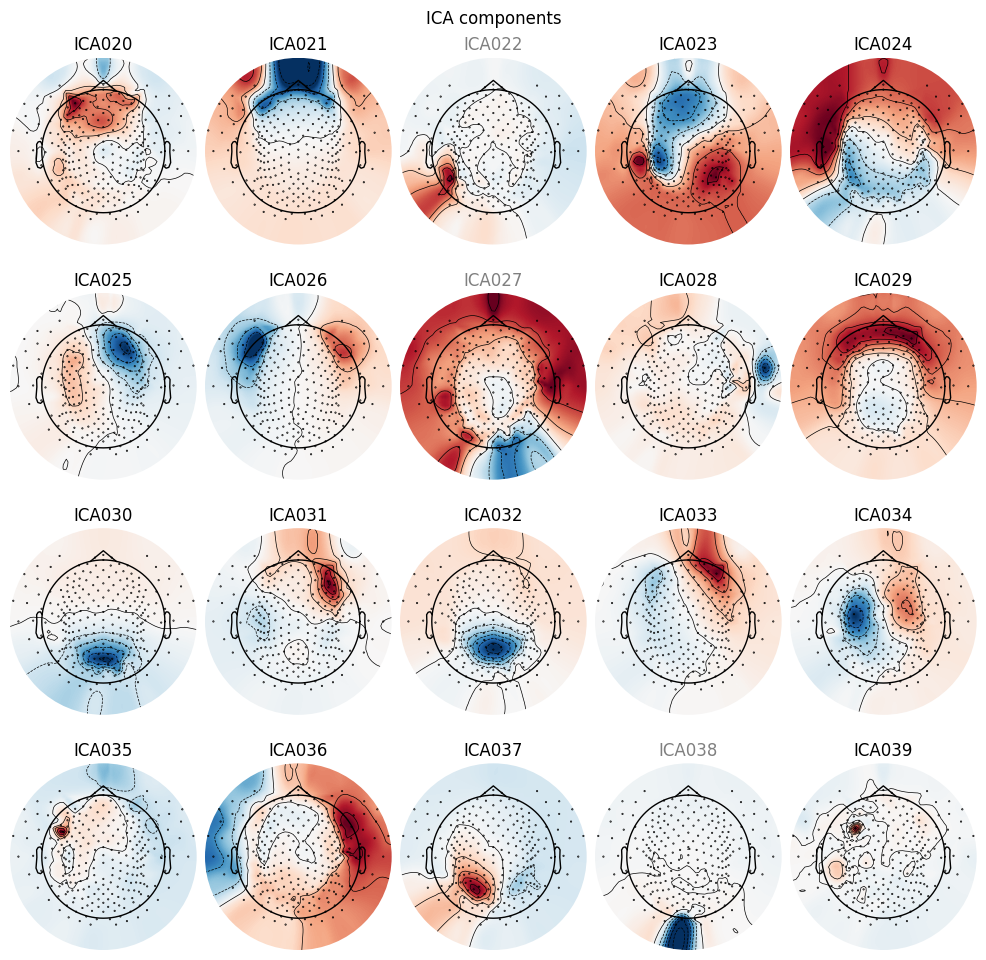

In [ ]:
_ = ica_pipe.plot_components()

Display component properties.

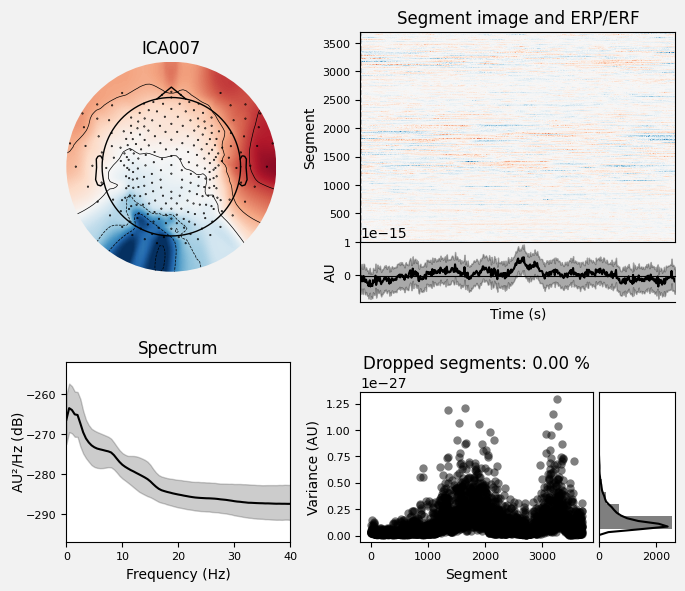

In [ ]:
_ = ica_pipe.plot_properties(picks=[7], psd_args=dict(fmin=0, fmax=40))

## Exclude
Apply to the raw signal ICA component exclusion.

In [ ]:
ica_pipe.apply()

## Save repaired EEG signal and ica solution

In [ ]:
ica_pipe.save_raw("after_ica_raw.fif", overwrite=True)

In [ ]:
ica_pipe.save_ica(fname="exclude-ica.fif", overwrite=True)